In [100]:
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from adjustText import adjust_text
from matplotlib.patches import Patch

## Load country data from GeoPackage

In [2]:
df = gpd.read_file('../data/world_boundaries_with_stats_centroid.gpkg')
total_edits = (df["sum_edits_corporate"].sum() + df["sum_edits_non_corporate"].sum()) / 1_000_000
print(f"total edits: {total_edits} Million")

total_corporate_edits = df["sum_edits_corporate"].sum() / 1_000_000
print(f"total corporate edits: {total_corporate_edits} Million")

total edits: 1097.518715 Million
total corporate edits: 130.170126 Million


In [53]:
df = df[
    (df["share_sum_edits_corporate"] > 0.10)
    &
    (df["sum_edits_corporate"] > 100_000)
]

df["diff_edits_corporate"] = df["t1_sum_edits_corporate"] - df["t0_sum_edits_corporate"]
df.sort_values("diff_edits_corporate", inplace=True)

display(df.columns)
display(len(df))
display(df.head())

Index(['ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH',
       'NAME_EN', 'country_iso_a3', 'post_t1_avg_monthly_edits_non_corporate',
       'post_t1_avg_monthly_edits_corporate',
       'post_t1_avg_monthly_contributors_non_corporate',
       'post_t1_avg_monthly_contributors_corporate',
       'post_t1_sum_edits_non_corporate', 'post_t1_sum_edits_corporate',
       'pre_t0_avg_monthly_edits_non_corporate',
       'pre_t0_avg_monthly_edits_corporate',
       'pre_t0_avg_monthly_contributors_non_corporate',
       'pre_t0_avg_monthly_contributors_corporate',
       'pre_t0_sum_edits_non_corporate', 'pre_t0_sum_edits_corporate',
       't0_avg_monthly_edits_non_corporate', 't0_avg_monthly_edits_corporate',
       't0_avg_monthly_contributors_non_corporate',
       't0_avg_monthly_contributors_corporate', 't0_sum_edits_non_corporate',
       't0_sum_edits_corporate', 't1_avg_monthly_edits_non_corporate',
       't1_avg_monthly_edits_corporate',
       't1_avg_monthly

36

,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,NAME_EN,country_iso_a3,post_t1_avg_monthly_edits_non_corporate,post_t1_avg_monthly_edits_corporate,...,t1_sum_edits_corporate,sum_edits_non_corporate,sum_edits_corporate,share_sum_edits_corporate,difference_avg_monthly_edits_non_corporate,difference_avg_monthly_edits_corporate,normalized_difference_avg_monthly_edits_non_corporate,normalized_difference_avg_monthly_edits_corporate,geometry,diff_edits_corporate
1,MX,MX,MEX,MEX,484,484,Mexico,MEX,88.684990,32.375036,...,1437403.0,5815039.0,12991241.0,0.691,7816.840404,-113856.755556,0.127804,-0.796785,POINT (-102.25017 23.59937),-10116435.0
41,US,US,USA,USA,840,840,United States of America,USA,2104.608708,65.081848,...,6543699.0,145164357.0,19759341.0,0.120,58943.532110,-61210.486239,0.044259,-0.337660,POINT (-99.31483 37.23674),-6671943.0
2,EG,EG,EGY,EGY,818,818,Egypt,EGY,12.974533,17.430039,...,560271.0,2843884.0,5876043.0,0.674,-19911.172028,-43165.333080,-0.729245,-0.768136,POINT (29.36954 26.89548),-4755501.0
16,BR,BR,BRA,BRA,076,076,Brazil,BRA,257.149474,33.995812,...,3067554.0,21300831.0,10359405.0,0.327,-5236.444004,-14350.951057,-0.061454,-0.352760,POINT (-49.71162 -14.07369),-4224297.0
5,VN,VN,VNM,VNM,704,704,Vietnam,VNM,74.604417,6.402140,...,566360.0,3754489.0,4803160.0,0.561,-13560.838585,-30547.338936,-0.432403,-0.762426,POINT (107.77693 15.99414),-3670440.0


## Plot countries with increase in corporate mapping

In [41]:
stats_df = pd.read_csv("../data/figX_corporate_mapping_trends_per_country.csv")
display(stats_df[stats_df["country_iso_a3"] == 'MEX'])

,country_iso_a3,corporation,t0_edits_total,t1_edits_total,diff_edits,norm_diff_edits
234,MEX,Apple,5658735,475691,-5183044,-0.844911
235,MEX,Kaart,5883409,943549,-4939860,-0.723581
236,MEX,Meta,5311,1873,-3438,-0.478563
237,MEX,Uber,1933,0,-1933,-1.000000
238,MEX,Amazon,1958,573,-1385,-0.547215
239,MEX,Mapbox,2086,1628,-458,-0.123317
240,MEX,Snap,366,2,-364,-0.989130
241,MEX,Lyft,1,48,47,0.959184
242,MEX,RocketData,0,53,53,1.000000
243,MEX,TIDBO,0,58,58,1.000000


## get countries that decreased

In [84]:
df[df["diff_edits_corporate"] < 0]

,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,NAME_EN,country_iso_a3,post_t1_avg_monthly_edits_non_corporate,post_t1_avg_monthly_edits_corporate,...,t1_sum_edits_corporate,sum_edits_non_corporate,sum_edits_corporate,share_sum_edits_corporate,difference_avg_monthly_edits_non_corporate,difference_avg_monthly_edits_corporate,normalized_difference_avg_monthly_edits_non_corporate,normalized_difference_avg_monthly_edits_corporate,geometry,diff_edits_corporate
1,MX,MX,MEX,MEX,484,484,Mexico,MEX,88.684990,32.375036,...,1437403.0,5815039.0,12991241.0,0.691,7816.840404,-113856.755556,0.127804,-0.796785,POINT (-102.25017 23.59937),-10116435.0
41,US,US,USA,USA,840,840,United States of America,USA,2104.608708,65.081848,...,6543699.0,145164357.0,19759341.0,0.120,58943.532110,-61210.486239,0.044259,-0.337660,POINT (-99.31483 37.23674),-6671943.0
2,EG,EG,EGY,EGY,818,818,Egypt,EGY,12.974533,17.430039,...,560271.0,2843884.0,5876043.0,0.674,-19911.172028,-43165.333080,-0.729245,-0.768136,POINT (29.36954 26.89548),-4755501.0
16,BR,BR,BRA,BRA,076,076,Brazil,BRA,257.149474,33.995812,...,3067554.0,21300831.0,10359405.0,0.327,-5236.444004,-14350.951057,-0.061454,-0.352760,POINT (-49.71162 -14.07369),-4224297.0
5,VN,VN,VNM,VNM,704,704,Vietnam,VNM,74.604417,6.402140,...,566360.0,3754489.0,4803160.0,0.561,-13560.838585,-30547.338936,-0.432403,-0.762426,POINT (107.77693 15.99414),-3670440.0
7,MY,MY,MYS,MYS,458,458,Malaysia,MYS,68.119529,13.614803,...,639907.0,2508190.0,3012521.0,0.546,-6219.640605,-13005.737579,-0.315576,-0.553529,POINT (102.07211 3.83292),-1732707.0
21,PH,PH,PHL,PHL,608,608,Philippines,PHL,144.284843,59.428281,...,1151503.0,10814532.0,4001760.0,0.270,-94664.572844,-37365.619464,-0.486636,-0.517102,POINT (125.20587 7.60386),-1698754.0
29,ZA,ZA,ZAF,ZAF,710,710,South Africa,ZAF,285.422666,11.681360,...,323139.0,5612327.0,1547473.0,0.216,-4293.325684,-4926.337945,-0.120629,-0.519788,POINT (26.14763 -28.40852),-901195.0
0,UY,UY,URY,URY,858,858,Uruguay,URY,55.451672,1.992157,...,58529.0,204125.0,805613.0,0.798,95.286425,-10086.083258,0.031021,-0.848499,POINT (-55.81892 -32.38745),-688555.0
49,UA,UA,UKR,UKR,804,804,Ukraine,UKR,611.584244,2.193431,...,360148.0,12402142.0,1403110.0,0.102,-1103.681756,-2799.090927,-0.022066,-0.492774,POINT (30.98077 48.80461),-682814.0


## create figure

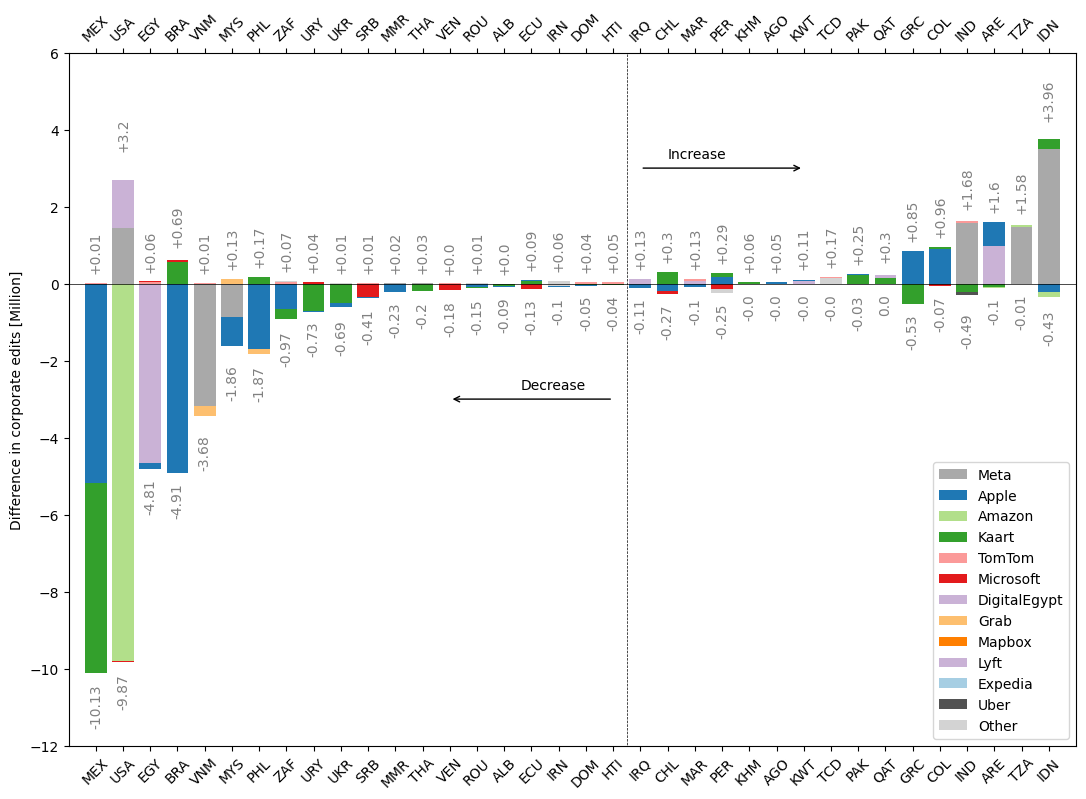

In [162]:
fig, ax = plt.subplots(figsize=(13,9))

countries = df["country_iso_a3"].values

custom_colormap = {
    'Meta': 'darkgrey',
    'Apple': '#1f78b4',
    'Amazon': '#b2df8a',
    'Kaart': '#33a02c',
    'TomTom': '#fb9a99',
    'Microsoft': '#e31a1c',
    'DigitalEgypt': '#cab2d6',
    'Grab': '#fdbf6f',
    'Mapbox': '#ff7f00',
    'Lyft': '#cab2d6',
    'Expedia':'#a6cee3' ,
    'Uber': '#525252',
    'Other': 'lightgrey',
}

legend_elements = []    
for corporation, color in custom_colormap.items():
    legend_elements.append(
         Patch(facecolor=color, label=corporation)   
    )

for i, country_iso_a3 in enumerate(countries):
    increase_df = stats_df[
        (stats_df["country_iso_a3"] == country_iso_a3) &
        (stats_df["diff_edits"] >= 0)
    ].sort_values("diff_edits", ascending=False)
    
    decrease_df = stats_df[
        (stats_df["country_iso_a3"] == country_iso_a3) &
        (stats_df["diff_edits"] < 0)
    ].sort_values("diff_edits", ascending=True)

    bottom = 0
    for corporation in increase_df["corporation"].unique():


        color = custom_colormap.get(corporation, 'lightgrey')
        
        bar_height = increase_df[
            increase_df["corporation"] == corporation
        ]["diff_edits"] / 1_000_000
        
        ax.bar(
            i,
            bar_height,
            color=color,
            bottom=bottom,
            label=corporation
        )
        bottom += bar_height
    
    bottom = 0
    for j, corporation in enumerate(decrease_df["corporation"].unique()):
        
        color = custom_colormap.get(corporation, 'lightgrey')
        bar_height = decrease_df[
            decrease_df["corporation"] == corporation
        ]["diff_edits"] / 1_000_000
        
        ax.bar(
            i,
            bar_height,
            color=color,
            bottom=bottom,
            label=corporation
        )
        bottom += bar_height

    min_value = decrease_df["diff_edits"].sum() / 1_000_000
    ax.annotate(
        round(min_value, 2),
        xy= (i - 0.25, min_value - 0.25),
        rotation=90,
        va='top',
        color="grey",
    )

    max_value = increase_df["diff_edits"].sum() / 1_000_000
    ax.annotate(
        f"+{round(max_value, 2)}",
        xy= (i - 0.25, max_value + 0.25),
        rotation=90,
        va='bottom',
        color="grey",
    )
        

ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
plt.xticks(
    range(0, len(countries)),
    countries,
    rotation=45
)


plt.plot(
    [-1, len(countries)+1],
    [0,0],
    linewidth=0.5,
    color='black'
)

plt.plot(
    [19.5, 19.5],
    [-20, 20],
    '--',
    color='black',
    linewidth=0.5
)

ax.annotate(
    "",
    xy=(13, -3),
    xytext=(19, -3),
    arrowprops=dict(arrowstyle="->")
)
ax.annotate(
    "Decrease",
    xy=(18, -2.75),
    ha="right"
)

ax.annotate(
    "",
    xy=(26, 3),
    xytext=(20, 3),
    arrowprops=dict(arrowstyle="->")
)
ax.annotate(
    "Increase",
    xy=(21, 3.25),
    ha="left"
)

plt.legend(handles=legend_elements, loc='lower right')
plt.xlim(-1, len(countries))
plt.ylim((-12, 6))
plt.ylabel("Difference in corporate edits [Million]")
#plt.title("Corporate mapping trend per country")

plt.savefig(
    "../figures/figX_corporate_mapping_trend_per_country.png",
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.1,
    facecolor='white'
)

plt.show()